# Sentiment Analysis using TF-IDF and Logistic Regression
This project performs sentiment analysis on customer reviews using TF-IDF vectorization and Logistic Regression.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load Dataset
df = pd.read_csv('merged_reviews.csv')
df.head()

,review,rating
0,Left side is not working..... It also often di...,1
1,Disappointed with the Experience. The selling ...,1
2,This is nice product. Although audio quality i...,3
3,Nice n clear sound...Good base tooWorthable pu...,5
4,Worked on iPhone 7 and didn’t work on iPhone X...,4


In [3]:
# Convert ratings to sentiment labels
def convert_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating <= 2:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['rating'].apply(convert_sentiment)
df = df[df['sentiment'] != 'neutral']  # Remove neutral reviews
df.head()

,review,rating,sentiment
0,Left side is not working..... It also often di...,1,negative
1,Disappointed with the Experience. The selling ...,1,negative
3,Nice n clear sound...Good base tooWorthable pu...,5,positive
4,Worked on iPhone 7 and didn’t work on iPhone X...,4,positive
5,Too good!!I have an iphone8 plus and it works ...,5,positive


In [5]:
# Text Preprocessing
import re
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def clean_text(text):
    text = text.lower()
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub(r'\d+', '', text)
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

df['clean_review'] = df['review'].apply(clean_text)
df.head()

,review,rating,sentiment,clean_review
0,Left side is not working..... It also often di...,1,negative,left side working also often disconnects phone...
1,Disappointed with the Experience. The selling ...,1,negative,disappointed experience selling point battery ...
3,Nice n clear sound...Good base tooWorthable pu...,5,positive,nice n clear soundgood base tooworthable purchase
4,Worked on iPhone 7 and didn’t work on iPhone X...,4,positive,worked iphone didn’t work iphone xrhttpsmmedia...
5,Too good!!I have an iphone8 plus and it works ...,5,positive,goodi iphone plus works great used original ip...


In [6]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_review'])
y = df['sentiment']

In [7]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Model Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy: 0.896536312849162

Classification Report:
               precision    recall  f1-score   support

    negative       0.88      0.76      0.82      1355
    positive       0.90      0.96      0.93      3120

    accuracy                           0.90      4475
   macro avg       0.89      0.86      0.87      4475
weighted avg       0.90      0.90      0.89      4475



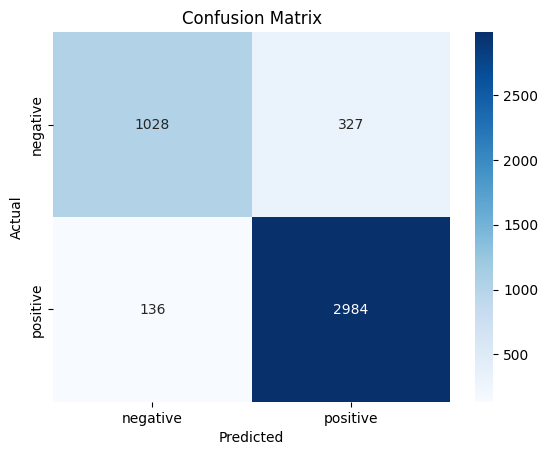

In [9]:
# Evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()